# LSTM on Amzon Fine Food Review

# Amazon Fine Food Review is about the reviews of customers on the food.

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059

# Attribute information:
 
1) Id: Number of rows

2) ProductId: Unique ID of product 

3) UserId: User identification number

4) ProfileName: User name

5) HelpfulnessNumerator: Number of user found the review helpful

6) HelpfulnessDenominator: Number of user who found the review helpful or not

7) Score: Rating given to the product

8) Time: Timestamp at the time of review posted

9) Summary: Short version of text review

10) Text: Detailed text review

# Objective:

We need to find if the review is positive (1) or negative (0).

We are provided with the score from 1 to 5. Let's assume score 1 & 2 are negative and score 4 & 5 are positive. We are ignoring 3 as it can be considered as neutral.

# Deep Learning

Deep learning is a part of machine learning which works in similar fashion as humans. The structural algorithm of deep learning is inspired from the biological neuron of human brain.

# Recurrent Neural Network

In Recurrent Neural Network (RNN), output from previous step are fed as input to the current step. Generally, all the inputs and outputs are independent of each other, but in few cases where we need to predict the next word of a sentence, previous words are required. These cases are dealt with the help of hidden layers. Main feature which makes different from MLP and CNN is the hidden feature which remembers some information about a sequence.

# Keras

Keras is a deep learning library which works on top of tensorflow (researcher's most preferable library). It is easy to program and understand.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

dft = pd.read_csv('Reviews.csv')

# Displaying first 5 rows
dft.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print('Number of columns:' + ' ' + str(len(dft.columns)))
print('Number of rows:' + ' ' + str(dft['Id'].nunique()))
print('Number of reviews:' + ' ' + str(dft['Id'].nunique()))
print('Number of products:' + ' ' + str(dft['ProductId'].nunique()))
print('Number of users:' + ' ' + str(dft['UserId'].nunique()))

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059


# Assign Polarity

Let us assign positive (1) to the score 4 and 5

Let us assign negative (0) to the score 1 and 2

Let us ignore score having 3

In [5]:
# Let us first create a new dataset which doesn't have score 3 and it's respective rows.

print('Number of rows before removing score 3:' + ' ' + str(dft['Id'].nunique()))

dft_score = dft[dft['Score'] != 3]

print('Number of rows after removing score 3:' + ' ' + str(dft_score['Id'].nunique()))

Number of rows before removing score 3: 568454
Number of rows after removing score 3: 525814


In [6]:
# Defining a function to assign polarity.

def scr(sc):
    if sc > 3:
        return 1
    return 0

In [7]:
# Calling function to assign polarity using .apply()
dft_score['Score'] = dft_score['Score'].apply(scr)

print("Number of positive (1) and negative (0) reviews")

dft_score['Score'].value_counts()

Number of positive (1) and negative (0) reviews


1    443777
0     82037
Name: Score, dtype: int64

# Exploratory Data Analysis

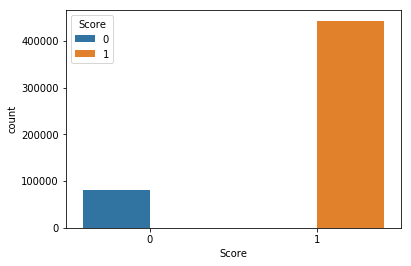

In [8]:
sns.countplot(dft_score['Score'], hue = dft_score['Score'])

# Observation:

As we can see, number of negative reviews are closer to 10k while positive review is more than 400k.

Ratio of negative and positive review can be assumed to be ~ 1:4.

Also, we can conclude that ~90% of the reviews are positive.

# Data Cleaning:

We have performed few techniques to clean the text and summary data

1) Null values removed

2) Duplicates removed

3) URL links removed

4) HTML tags removed

5) Stopwords removed

6) Stem words obtained

7) Converted from short form word to long form word

We have already performed above data clearning technique and saved.

Importing the clean data.

 ___ <b>Importing already cleaned data 'Amazon_Final_time.csv'___

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('drive/My Drive/Decision Tree Folder/Amazon_Final_time.csv')

In [0]:
# Removing null values if any

df.dropna(inplace = True)

# Vocabulary of words

Creating a dictionary of words where key will be words and values will be count of words

Creating vocabulary of words referred from: https://github.com/Manish-12/LSTM-on-amazon-fine-food-reviews/blob/master/LSTM_Amazon.ipynb

In [0]:
voc = dict()

for sent in df.Clean_Text.values:
  sent = str(sent)
  words = sent.split()
  for word in words:
    if word not in voc.keys():
      voc[word] = 1
    else:
      voc[word] += 1

 ___<b>Sorting vocabulary in descending order<b>___

In [0]:
import operator
sorted_dict = sorted(voc.items(), key=operator.itemgetter(1),reverse = True)

 ___<b>Getting rank for each word<b>___

In [0]:
ranking = dict()
rank = 1
for i in range(len(sorted_dict)):
    k = sorted_dict[i][0]
    ranking[k] = rank
    rank += 1

In [145]:
print("Total number of words in ranking dictionary:", len(ranking))

Total number of words in ranking dictionary: 88938


 ___<b>Assigning ranks to respective words in rows<b>___

In [0]:
x = []

for se in df.Clean_Text.values:
    row = []
    
    for wo in se.split():
        row.append(ranking[wo])
    x.append(row)

 ___<b>Taking 25k rows<b>___

In [147]:
x = x[:25000]
y = df.Score[:25000]


print("Size of x:", len(x))
print("Size of y:", len(y))

Size of x: 25000
Size of y: 25000


# Splitting data into train and test set

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = False, random_state = 0)

In [149]:
print("Size of x_train:", len(x_train))
print("Size of x_test:", len(x_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))

Size of x_train: 17500
Size of x_test: 7500
Size of y_train: 17500
Size of y_test: 7500


# Importing Keras libraries

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [151]:
print("1st row in x_train:", x_train[1], '\n')
print("Type of x_train:", type(x_train[1]), '\n')
print("Length of x_train:", len(x_train[1]))

1st row in x_train: [1043, 230, 13202, 1086, 655, 19, 8168, 1216, 2762, 8, 362, 8, 139, 590, 123, 617, 370, 12226, 105, 211, 3339, 93, 71, 251, 84, 1650, 145] 

Type of x_train: <class 'list'> 

Length of x_train: 27


 ___<b>Taking maximum review length of 300<b>___

In [152]:
# truncate and/or pad input sequences
max_review_length = 300
x_train = sequence.pad_sequences(x_train, maxlen = max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen = max_review_length)

print(x_train.shape)
print(x_train[1])

(17500, 300)
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  

# Defining 'plt_la' function

In [0]:
# Defining 'plt_la' function

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_la(x, vy, ty, ax, t, colors=['b']):
 
  if t == 'loss':
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.title("Epoch vs Loss")
    plt.legend()
    plt.grid()
  
  if t == 'acc':
    ax.plot(x, vy, 'b', label="Validation Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.title("Epoch vs Accuracy")
    plt.legend()
    plt.grid()

# Defining a function 'plotting' to visualize epoch vs loss

In [0]:
# Defining a function 'plotting' to visualize epoch vs loss

epochs = 10

def plotting(history, t):

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy')

  # list of epoch numbers
  x = list(range(1,epochs+1))

  # print(history.history.keys())
  # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  
  if t == 'loss':
    vy = history.history['val_loss']
    ty = history.history['loss']
  
    plt_la(x, vy, ty, ax, t)
    
  if t == 'acc':
    vy = history.history['val_acc']
    ty = history.history['acc']
  
    plt_la(x, vy, ty, ax, t)
  
  return vy, ty

# LSTM layer: 1

In [155]:
embedding_vecor_length = 32
model_1 = Sequential()
model_1.add(Embedding(len(voc.keys())+1, embedding_vecor_length, input_length = max_review_length))
model_1.add(Dropout(0.5))

# 1 LSTM layer
model_1.add(LSTM(100))   # 1 LSTM

model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation = 'sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_1.summary())
            
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 32)           2846048   
_________________________________________________________________
dropout_7 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 2,899,349
Trainable params: 2,899,349
Non-trainable params: 0
_________________________________________________________________
None


In [156]:
history_1 = model_1.fit(x_train, y_train, nb_epoch = 10, batch_size = 64, validation_data = (x_test, y_test))

# Final evaluation of the model
scores_1 = model_1.evaluate(x_test, y_test, verbose = 1)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 153s 9ms/step - loss: 0.3722 - acc: 0.8585 - val_loss: 0.2639 - val_acc: 0.8916
Epoch 2/10
17500/17500 [==============================] - 152s 9ms/step - loss: 0.2244 - acc: 0.9154 - val_loss: 0.2579 - val_acc: 0.8959
Epoch 3/10
17500/17500 [==============================] - 150s 9ms/step - loss: 0.1732 - acc: 0.9357 - val_loss: 0.2987 - val_acc: 0.9031
Epoch 4/10
17500/17500 [==============================] - 152s 9ms/step - loss: 0.1447 - acc: 0.9463 - val_loss: 0.2710 - val_acc: 0.8917
Epoch 5/10
17500/17500 [==============================] - 149s 8ms/step - loss: 0.1306 - acc: 0.9540 - val_loss: 0.2841 - val_acc: 0.8963
Epoch 6/10
17500/17500 [==============================] - 151s 9ms/step - loss: 0.1107 - acc: 0.9617 - val_loss: 0.3055 - val_acc: 0.8949
Epoch 7/10
17500/17500 [==============================] - 149s 9ms/step - loss: 0.0972 - acc: 0.9656 - val_loss: 0.3097 - v

# Calling 'plotting' function to visualize epoch vs loss

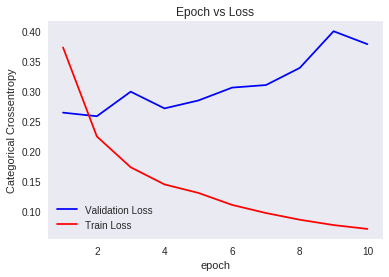

In [157]:
v_l_1, t_l_1 = plotting(history_1, 'loss')

# Calling 'plotting' function to visualize epoch vs accuracy

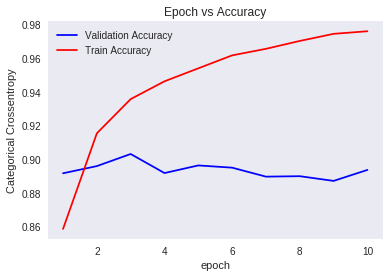

In [158]:
v_a_1, t_a_1 = plotting(history_1, 'acc')

# observation

In [159]:
tr_a_1 = np.round(max(t_a_1),3)
va_a_1 = np.round(max(v_a_1),3)

print("Train accuracy:", tr_a_1)
print("Validation accuracy:", va_a_1, '\n')

tr_l_1 = np.round(min(t_l_1),3)
va_l_1 = np.round(min(v_l_1),3)

print("Train loss:", tr_l_1)
print("Validation loss:", va_l_1)

Train accuracy: 0.976
Validation accuracy: 0.903 

Train loss: 0.071
Validation loss: 0.258


# LSTM layer: 3

In [161]:
# create the model

embedding_vecor_length = 32
model_3 = Sequential()
model_3.add(Embedding(len(voc.keys())+1, embedding_vecor_length, input_length = max_review_length))
model_3.add(Dropout(0.5))

# 3 LSTM layer
model_3.add(LSTM(100, return_sequences=True))  # 1 LSTM
model_3.add(LSTM(100, return_sequences=True))  # 2 LSTM
model_3.add(Dropout(0.5))
model_3.add(LSTM(100))                         # 3 LSTM

model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation = 'sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_3.summary())
            
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 300, 32)           2846048   
_________________________________________________________________
dropout_11 (Dropout)         (None, 300, 32)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 300, 100)          53200     
_________________________________________________________________
lstm_32 (LSTM)               (None, 300, 100)          80400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 300, 100)          0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
__________

In [162]:
history_3 = model_3.fit(x_train, y_train, nb_epoch = 10, batch_size = 64, validation_data = (x_test, y_test))

# Final evaluation of the model
scores_3 = model_3.evaluate(x_test, y_test, verbose = 1)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 452s 26ms/step - loss: 0.3482 - acc: 0.8653 - val_loss: 0.2562 - val_acc: 0.8981
Epoch 2/10
17500/17500 [==============================] - 448s 26ms/step - loss: 0.2188 - acc: 0.9148 - val_loss: 0.2652 - val_acc: 0.8996
Epoch 3/10
17500/17500 [==============================] - 446s 25ms/step - loss: 0.1717 - acc: 0.9364 - val_loss: 0.2894 - val_acc: 0.8988
Epoch 4/10
17500/17500 [==============================] - 446s 26ms/step - loss: 0.1465 - acc: 0.9463 - val_loss: 0.2777 - val_acc: 0.8971
Epoch 5/10
17500/17500 [==============================] - 446s 26ms/step - loss: 0.1208 - acc: 0.9573 - val_loss: 0.2890 - val_acc: 0.8913
Epoch 6/10
17500/17500 [==============================] - 447s 26ms/step - loss: 0.1023 - acc: 0.9626 - val_loss: 0.3186 - val_acc: 0.8939
Epoch 7/10
17500/17500 [==============================] - 448s 26ms/step - loss: 0.0904 - acc: 0.9699 - val_loss: 0.3

# Calling 'plotting' function to visualize epoch vs loss

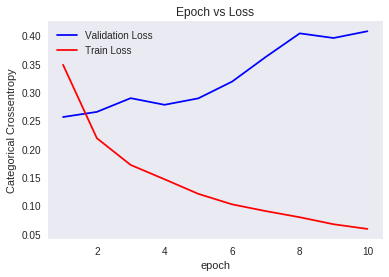

In [163]:
v_l_3, t_l_3 = plotting(history_3, 'loss')

# Calling 'plotting' function to visualize epoch vs accuracy

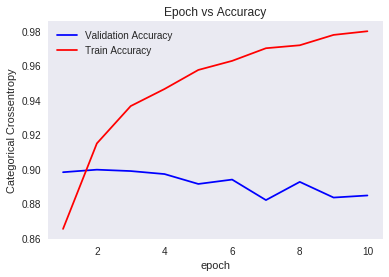

In [164]:
v_a_3, t_a_3 = plotting(history_3, 'acc')

# Observation

In [165]:
tr_a_3 = np.round(max(t_a_3),3)
va_a_3 = np.round(max(v_a_3),3)

print("Train accuracy:", tr_a_3)
print("Validation accuracy:", va_a_3, '\n')

tr_l_3 = np.round(min(t_l_3),3)
va_l_3 = np.round(min(v_a_3),3)

print("Train loss:", tr_l_3)
print("Validation loss:", va_l_3)

Train accuracy: 0.98
Validation accuracy: 0.9 

Train loss: 0.059
Validation loss: 0.882


# LSTM layer: 5

In [132]:
# create the model

embedding_vecor_length = 32
model_5 = Sequential()
model_5.add(Embedding(len(voc.keys())+1, embedding_vecor_length, input_length = max_review_length))
model_5.add(Dropout(0.5))

# 5 LSTM layer
model_5.add(LSTM(100, return_sequences=True))  # 1 LSTM
model_5.add(LSTM(100, return_sequences=True))  # 2 LSTM

model_5.add(Dropout(0.5))

model_5.add(LSTM(100, return_sequences=True))  # 3 LSTM
model_5.add(LSTM(100, return_sequences=True))  # 4 LSTM
model_5.add(LSTM(100))                         # 5 LSTM

model_5.add(Dropout(0.5))
model_5.add(Dense(1, activation = 'sigmoid'))
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_5.summary())
            
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 300, 32)           2846048   
_________________________________________________________________
dropout_4 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 300, 100)          53200     
_________________________________________________________________
lstm_23 (LSTM)               (None, 300, 100)          80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 300, 100)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 300, 100)          80400     
_________________________________________________________________
lstm_25 (LSTM)               (None, 300, 100)          80400     
__________

In [133]:
history_5 = model_5.fit(x_train, y_train, nb_epoch = 10, batch_size = 64, validation_data = (x_test, y_test))

# Final evaluation of the model
scores_5 = model_5.evaluate(x_test, y_test, verbose = 1)

Train on 700 samples, validate on 300 samples
Epoch 1/10
700/700 [==============================] - 35s 51ms/step - loss: 0.5829 - acc: 0.8029 - val_loss: 0.4959 - val_acc: 0.8067
Epoch 2/10
700/700 [==============================] - 31s 44ms/step - loss: 0.4467 - acc: 0.8414 - val_loss: 0.5018 - val_acc: 0.8067
Epoch 3/10
700/700 [==============================] - 30s 43ms/step - loss: 0.4427 - acc: 0.8414 - val_loss: 0.4941 - val_acc: 0.8067
Epoch 4/10
700/700 [==============================] - 31s 44ms/step - loss: 0.4313 - acc: 0.8414 - val_loss: 0.4909 - val_acc: 0.8067
Epoch 5/10
700/700 [==============================] - 30s 43ms/step - loss: 0.3336 - acc: 0.8714 - val_loss: 0.5434 - val_acc: 0.7533
Epoch 6/10
700/700 [==============================] - 30s 44ms/step - loss: 0.1704 - acc: 0.9400 - val_loss: 0.6260 - val_acc: 0.7667
Epoch 7/10
700/700 [==============================] - 32s 45ms/step - loss: 0.0920 - acc: 0.9643 - val_loss: 0.9163 - val_acc: 0.6767
Epoch 8/10
700/7

# Calling 'plotting' function to visualize epoch vs loss

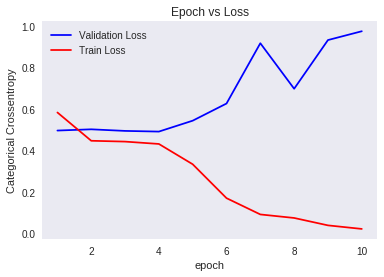

In [134]:
v_l_5, t_l_5 = plotting(history_5, 'loss')

# Calling 'plotting' function to visualize epoch vs accuracy

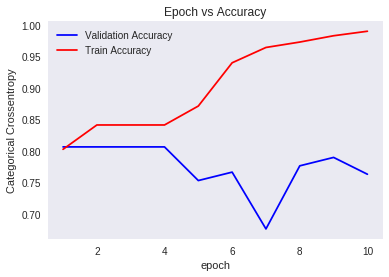

In [135]:
v_a_5, t_a_5 = plotting(history_5, 'acc')

# Observation

In [136]:
tr_a_5 = np.round(max(t_a_5),3)
va_a_5 = np.round(max(v_a_5),3)

print("Train accuracy:", tr_a_5)
print("Validation accuracy:", va_a_5, '\n')

tr_l_5 = np.round(min(t_l_5),3)
va_l_5 = np.round(min(v_a_5),3)

print("Train loss:", tr_l_5)
print("Validation loss:", va_l_5)

Train accuracy: 0.99
Validation accuracy: 0.807 

Train loss: 0.022
Validation loss: 0.677


# Pretty Table

In [22]:
from prettytable import PrettyTable

print('\n')
a = PrettyTable()
a.field_names = ['S.No', 'LSTM Layers', 'Drop Out', 'Test Loss', 'Test Accuracy']
a.add_row([1, 1, 0.5, va_l_1, va_a_1])
a.add_row([2, 3, 0.5, va_l_3, va_a_3])

print(a.get_string(title = "LSTM 1 and 3 Activation: sigmoid,    Optimizer: adam"))



+------+-------------+----------+-----------+---------------+
| S.No | LSTM Layers | Drop Out | Test Loss | Test Accuracy |
+------+-------------+----------+-----------+---------------+
|  1   |      1      |   0.5    |   0.258   |     0.903     |
|  2   |      3      |   0.5    |   0.882   |      0.9      |
+------+-------------+----------+-----------+---------------+


# Conclusion:

 - <b>LSTM layer 1:</b>
    
    - ___Test loss is 0.258 and test accuracy is high 90.3%___
    
    
 - <b>LSTM layer 3:</b>
    
    - ___Test loss is 0.882 and  test accuracy is high 90%___